In [ ]:
!pip install pandas scikit-learn imbalanced-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/combined_incense_dataset.csv")

In [ ]:
# Target variable
y = df['Recommend_To_Others']
X = df.drop(columns=["Recommend_To_Others"])

In [ ]:

# Identify categorical and numeric features
cat_features = X.columns.tolist()
num_features = []  # if you add numerical fields later

In [ ]:
# Preprocessing steps
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop='first'), cat_features)
], remainder='passthrough')

In [ ]:
# Final model pipeline
model_pipeline = ImbPipeline(steps=[
    ('pre', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', VotingClassifier(estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)),
        ('lr', LogisticRegression(max_iter=1000, solver='liblinear'))
    ], voting='soft'))
])

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Age_Group', 'Gender',
                                                   'Region', 'Frequency_Usage',
                                                   'Eco_Concern_Level',
                                                   'Awareness_Recycled_Incense',
                                                   'Likes_Fragrance',
                                                   'Prefers_Traditional_Scents',
                                                   'Influenced_By_Branding',
                                                   'Seen_Ads',
                                                   'Buys_Sustainably'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(max_depth=10,
                                                                      random_state=42)),
                                              ('gb',
                                               GradientBoostingClassifier(max_depth=4,
                                                                          n_estimators=200,
                                                                          random_state=42)),
                                              ('lr',
                                               LogisticRegression(max_iter=1000,
                                                                  solver='liblinear'))],
                                  voting='soft'))])

In [ ]:
# Predict and evaluate
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the cleaned dataset
df = pd.read_csv("/content/drive/MyDrive/cleaned_combined_incense_dataset.csv")

In [ ]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<ipython-input-17-998560319>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recommend_To_Others', data=df, palette='viridis')


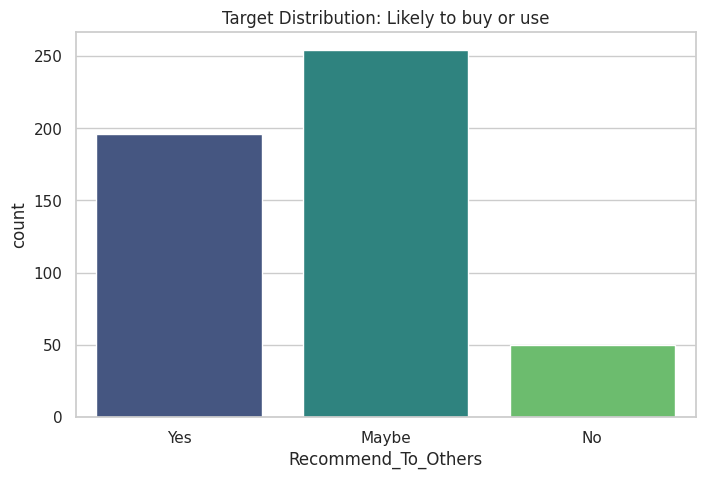

In [ ]:
# ---------------------
# 1. Target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Recommend_To_Others', data=df, palette='viridis')
plt.title("Target Distribution: Likely to buy or use")
plt.show()

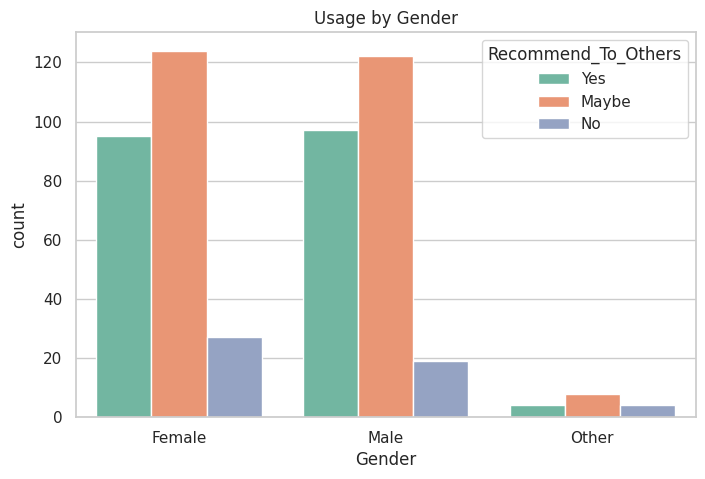

In [ ]:
# ---------------------
# 2. Gender vs Recommendation
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Recommend_To_Others', data=df, palette='Set2')
plt.title("Usage by Gender")
plt.show()


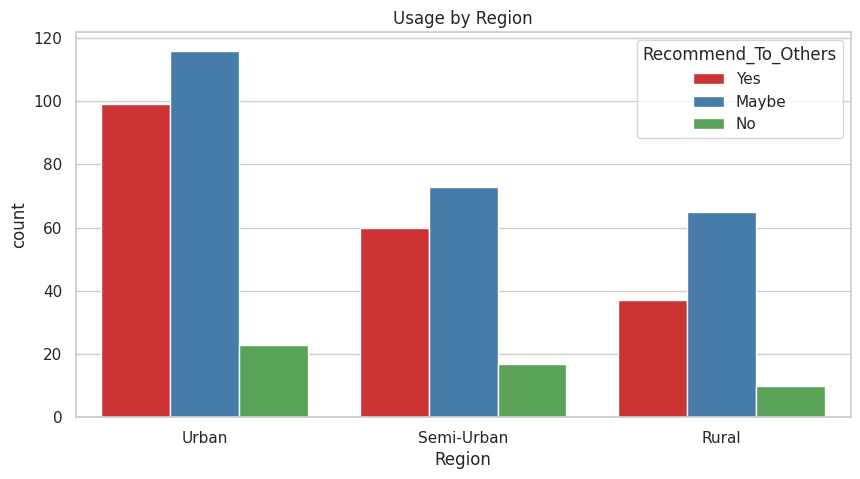

In [ ]:
# ---------------------
# 3. Region vs Recommendation
plt.figure(figsize=(10, 5))
sns.countplot(x='Region', hue='Recommend_To_Others', data=df, palette='Set1')
plt.title("Usage by Region")
plt.show()

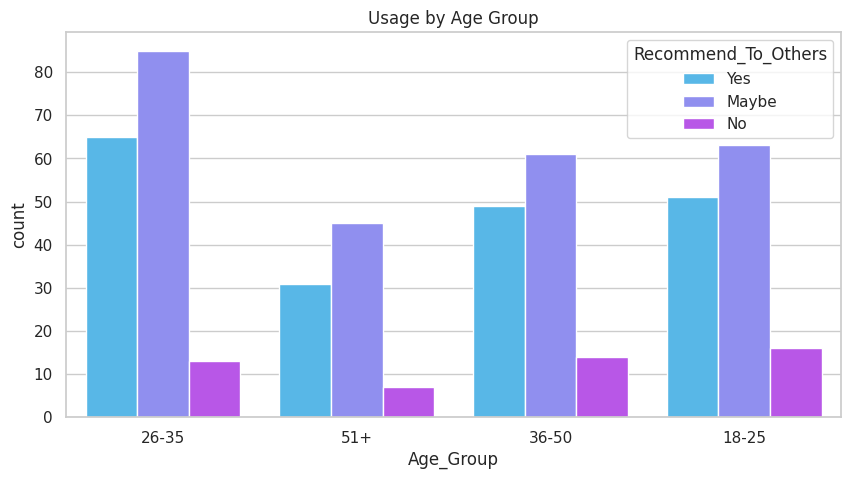

In [ ]:
# 4. Age Group vs Recommend
plt.figure(figsize=(10, 5))
sns.countplot(x='Age_Group', hue='Recommend_To_Others', data=df, palette='cool')
plt.title("Usage by Age Group")
plt.show()

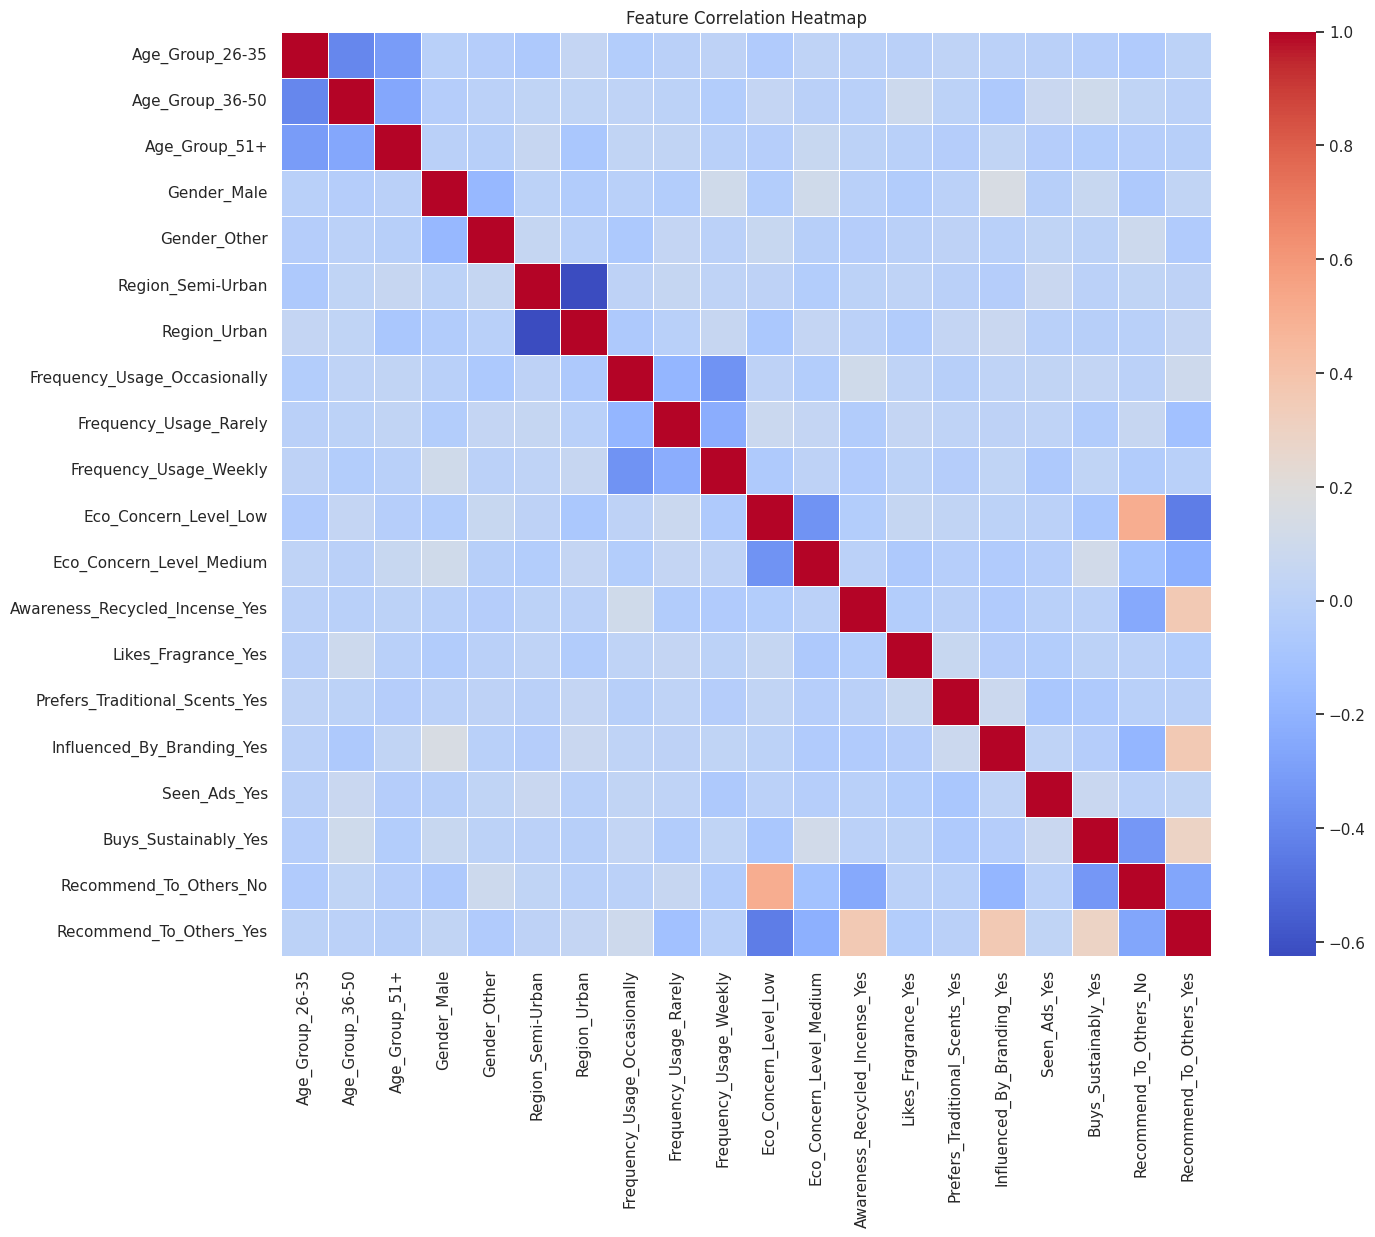

In [ ]:
# ---------------------
# 5. Correlation heatmap (One-hot encoding required)
encoded_df = pd.get_dummies(df, drop_first=True)
corr = encoded_df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
product_factors = [
    "Buys_Sustainably",
    "Seen_Ads",
    "Likes_Fragrance",
    "Influenced_By_Branding",
    "Awareness_Recycled_Incense"
]

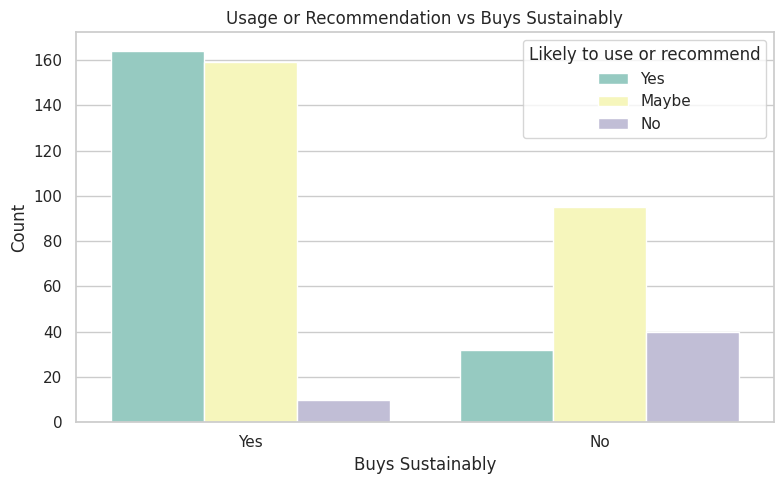

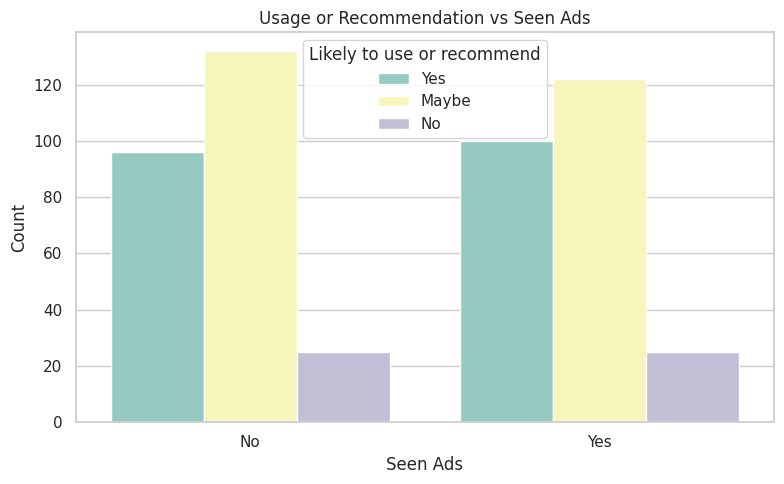

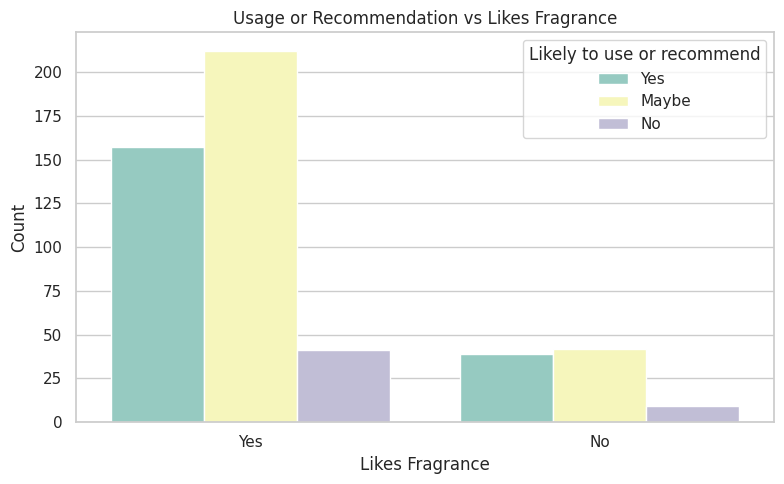

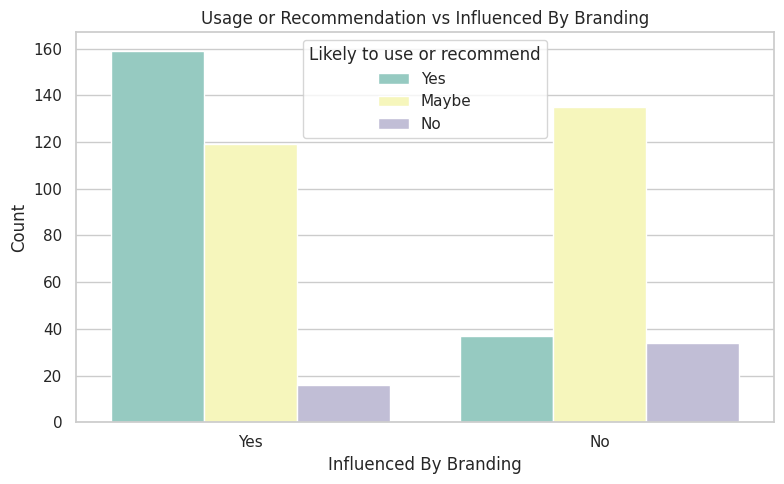

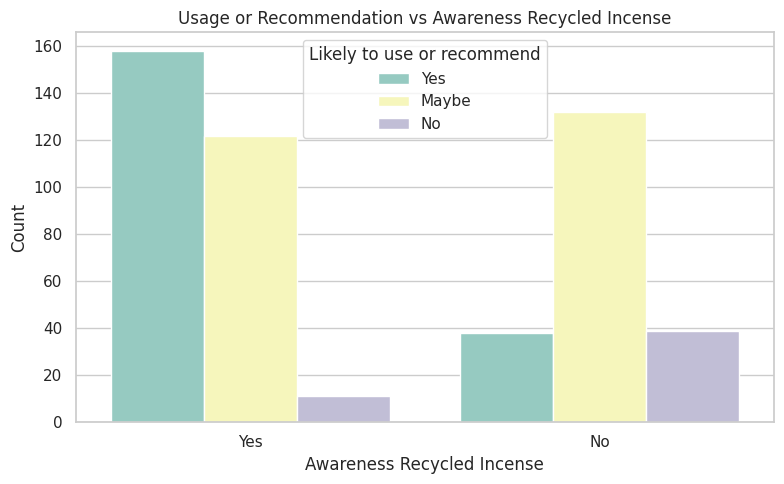

In [ ]:
for feature in product_factors:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue="Recommend_To_Others", data=df, palette="Set3")
    plt.title(f"Usage or Recommendation vs {feature.replace('_', ' ')}")
    plt.xlabel(feature.replace('_', ' '))
    plt.ylabel("Count")
    plt.legend(title="Likely to use or recommend")
    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np

In [ ]:
# Simulate a price range based on frequency usage (as a proxy)
df["Price_Range"] = np.select(
    [
        df["Frequency_Usage"] == "Daily",
        df["Frequency_Usage"] == "Weekly",
        df["Frequency_Usage"] == "Rarely"
    ],
    [
        "Low (₹30-₹50)",
        "Medium (₹50-₹100)",
        "High (₹100+)"
    ],
    default="Unknown"
)

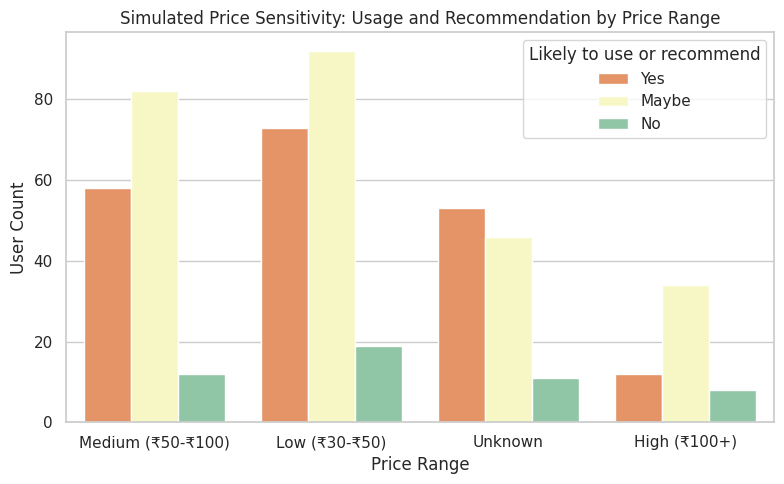

In [ ]:
# Now plot price sensitivity
plt.figure(figsize=(8, 5))
sns.countplot(x='Price_Range', hue='Recommend_To_Others', data=df, palette='Spectral')
plt.title("Simulated Price Sensitivity: Usage and Recommendation by Price Range")
plt.xlabel("Price Range")
plt.ylabel("User Count")
plt.legend(title="Likely to use or recommend")
plt.tight_layout()
plt.show()